<a href="https://colab.research.google.com/github/italolima04/monitoria-probabilidade-estatistica/blob/master/Minicurso-Python/Aula01/Minicurso_Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas e Dados


In [0]:
import pandas as pd
import numpy as np 

**Há duas formas de criar um Data Frame a partir de dados CSV**

A primeira é mais indireta e detalhada, a segunda é mais direta.

In [0]:
url = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv'
df = pd.DataFrame()
df = pd.read_csv(url)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')

**Esse conjunto de dados foi disponibilizado pela Alura em um de seus cursos e a base de dados original pertence ao site MovieLens**

https://movielens.org/

# Explorando os Dados

**Para visualizar o Data Frame criado, basta digitar o nome do mesmo e executar a Célula**

In [4]:
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Esse Dataset é uma amostra de dados criada a partir de votos de usuários em filmes no site MovieLens

**É possível também visualizar apenas uma parte dos dados**

O método head do Pandas retorna as 5 primeiras linhas do Data Frame

In [5]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**É possível passar como parâmetro do método head a quantidade de linhas a serem exibidas**

In [6]:
df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


**Visualizando a estrutura do Data Frame**

O método shape da biblioteca Pandas exibe a estrutura da nossa estrutura de dados bidimensional, ou seja, informa a quantidade de linhas e colunas do Data Frame, nessa ordem respectivamente.

In [7]:
df.shape

(100836, 4)

# Manipulando os Dados

**Por se tratar de um dataset com votos para filmes, seria interessante conhecermos a escala utilizada para as notas**

Podemos começar descobrindo a nota máxima e a mínima.

**Os [ ] são utilizados para desestruturar o Data Frame, ou seja, assim acessamos apenas alguma(s) coluna(s) em específico**


In [8]:
#O método max() da biblioteca Numpy retorna o maior valor de uma Series
df['rating'].max()

5.0

In [9]:
#O método min() da biblioteca Numpy retorna o menor valor de uma Series
df['rating'].min()

0.5

Agora já conhecemos a maior e menor nota, no entanto, não sabemos quais são as notas únicas que um usuário pode atribuir.

In [10]:
#O método unique() do Pandas retorna os valores únicos para uma Series
df['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

# Aplicando Conceitos de Estatística


**Podemos observar algumas medidas de tendência central e de posição**

A partir das notas, podemos visualizar a média, mediana, desvio padrão e os quartis. 

In [11]:
#Método do Pandas para descrição estatística dos dados
df['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

**count** = Quantidade de linhas da coluna 'rating'.

**mean** = Média de todas as notas.

**std** = Desvio padrão para todas as notas.

**min** = Entrada miníma, ou seja: menor nota atribuída.

**25**% = 1º Quartil dos dados.

**50**% = 2º Quartil dos dados e respectivamente a mediana.

**75**% = 3º Quartil dos dados.

**max** = Entrada máxima, ou seja: maior nota atribuída.

**Uma primeira possível observação que podemos fazer é que os nossos dados apresentam uma "baixa" variação, destacada pelo valor desvio padrão.**

Uma possível explicação é que o site apresenta uma escala delimitada e relativamente pequena (0.5 - 5)

**Temos a média e a mediana, é possível descobrir a moda ?**

In [12]:
#Utilizando o método value_counts para retornar a frequência na qual cada nota aparece.
df['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

**Assim, percebemos que a nota 4 foi a que apareceu mais vezes, portanto é a moda para esses dados**

# Visualizando os dados através de Gráficos

**Histograma**

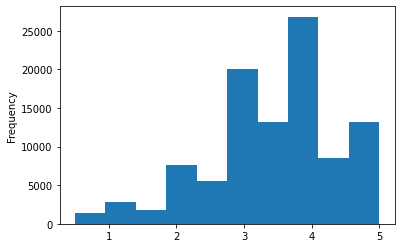

In [13]:
df['rating'].plot(kind='hist')

In [14]:
#Criando um novo Data Frame
notas = pd.DataFrame()
#Utilizando o método concat do Pandas para concatenar as notas e as suas frequências respectivas
notas = pd.concat([notas, df['rating'].value_counts()], ignore_index=False, axis=1).reset_index()
#Renomenando as duas colunas do Data Frame
notas.columns= ['notas', 'frequencia']
notas

,notas,frequencia
0,4.0,26818
1,3.0,20047
2,5.0,13211
3,3.5,13136
4,4.5,8551
5,2.0,7551
6,2.5,5550
7,1.0,2811
8,1.5,1791
9,0.5,1370


**Gráfico de Barras Horizontal**

Podemos utilizar uma outra biblioteca do Python, esta é focada na visualização de dados.

In [0]:
#Importando biblitoecas Matplotlib
import matplotlib.pyplot as plt


<BarContainer object of 10 artists>

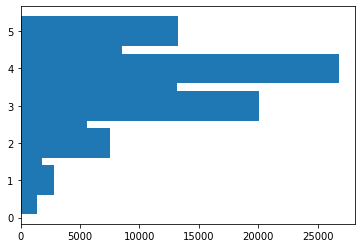

In [22]:
plt.barh(notas.notas, notas.frequencia)

Repare que, os gráficos acima apesar de fáceis de plotar não possuem uma visualização tão límpida por uma série de fatores, com a biblioteca matplotlib podemos melhorar e detalhar essa visualização.

**Configurando Gráfico com Matplotlib**

Como exemplo, iremos utilizar o histograma, já apresentado acima.

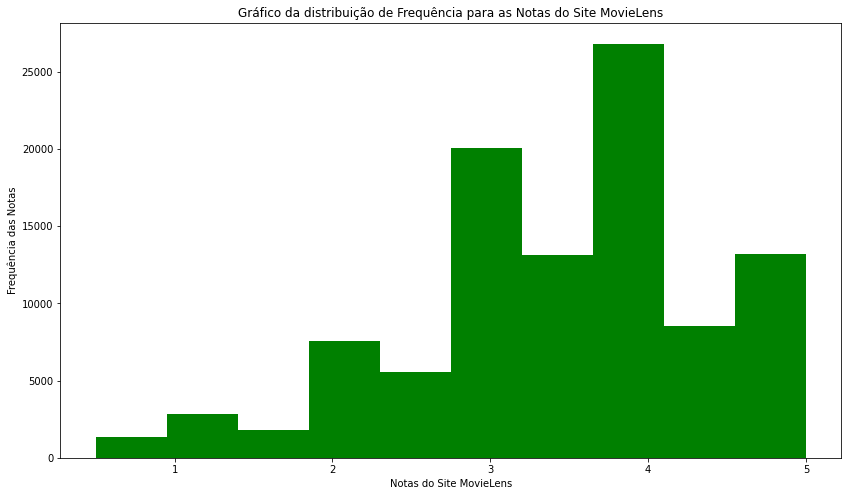

In [30]:
#Definir um tamanho para a figura
plt.figure(figsize=(14,8))

#Criar o gráfico e alterando a cor padrão
df['rating'].plot(kind='hist', color='green')

#Atribuir um Título para o Gŕafico
plt.title('Gráfico da distribuição de Frequência para as Notas do Site MovieLens')

#Configurar os labels do eixo X e Y, respectivamente
plt.xlabel('Notas do Site MovieLens')
plt.ylabel('Frequência das Notas')

#Exibir o Gráfico
plt.show()